In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("play_golf_train.csv", sep= ";")
df.head()

,Outlook,Temperature Numeric,Temperature Nominal,Humidity Numeric,Humidity Nominal,Windy,Play
0,overcast,83,hot,86,high,False,yes
1,overcast,64,cool,65,normal,True,yes
2,overcast,72,mild,90,high,True,yes
3,overcast,81,hot,75,normal,False,yes
4,rainy,70,mild,96,high,False,yes


In [3]:
df.describe()

,Temperature Numeric,Humidity Numeric
count,14.000000,14.000000
mean,73.571429,81.642857
std,6.571667,10.285218
min,64.000000,65.000000
25%,69.250000,71.250000
50%,72.000000,82.500000
75%,78.750000,90.000000
max,85.000000,96.000000


In [4]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=["Outlook", "Temperature Nominal", "Humidity Nominal", "Windy"])
df = encoder.fit_transform(df)

In [5]:
df.head()

,Outlook_1,Outlook_2,Outlook_3,Temperature Numeric,Temperature Nominal_1,Temperature Nominal_2,Temperature Nominal_3,Humidity Numeric,Humidity Nominal_1,Humidity Nominal_2,Windy_1,Windy_2,Play
0,1,0,0,83,1,0,0,86,1,0,1,0,yes
1,1,0,0,64,0,1,0,65,0,1,0,1,yes
2,1,0,0,72,0,0,1,90,1,0,0,1,yes
3,1,0,0,81,1,0,0,75,0,1,1,0,yes
4,0,1,0,70,0,0,1,96,1,0,1,0,yes


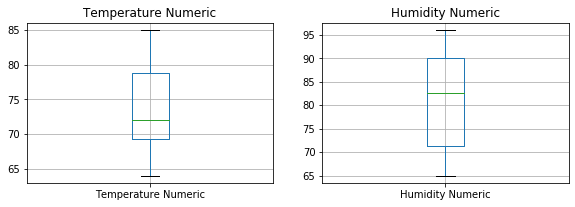

In [8]:
plt.figure(figsize = (15, 10))
cols=["Temperature Numeric", "Humidity Numeric"]
for i in range(1, len(cols)+1):
    plt.subplot(3,3,i)
    fig = df.boxplot(column = [cols[i-1]])
    fig.set_title(cols[i-1])


In [9]:
x = df.drop("Play", axis = 1)
y = df["Play"]

In [52]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 1)

In [53]:
from sklearn.preprocessing import RobustScaler
scalar = RobustScaler()

xtrain = scalar.fit_transform(xtrain)
xtest = scalar.transform(xtest)

In [54]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [55]:
y_pred = gnb.predict(xtest)

y_pred

array(['yes', 'yes', 'yes', 'yes'], dtype='<U3')

In [56]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(ytest, y_pred)))


Model accuracy score: 0.7500
